In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
 
import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = r"C:\Users\Lenovo\OneDrive\Desktop\flights-sagemaker-project\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-03-06,Delhi,Cochin,16:40:00,19:15:00,1595,2.0,No Info,12646
1,Multiple Carriers,2019-03-03,Delhi,Cochin,07:10:00,22:20:00,910,1.0,In-flight meal not included,11125
2,Jet Airways,2019-05-15,Kolkata,Banglore,21:10:00,09:20:00,730,1.0,In-flight meal not included,9663
3,Jet Airways,2019-06-06,Delhi,Cochin,09:40:00,04:25:00,1125,2.0,In-flight meal not included,10368
4,Jet Airways,2019-05-06,Kolkata,Banglore,16:30:00,20:45:00,1695,1.0,In-flight meal not included,9663
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-21,Delhi,Cochin,08:55:00,19:15:00,620,1.0,No Info,10161
636,Air India,2019-03-27,Delhi,Cochin,20:30:00,08:15:00,705,1.0,No Info,5998
637,Spicejet,2019-04-09,Banglore,Delhi,09:30:00,12:20:00,170,0.0,No check-in baggage included,4319
638,Indigo,2019-04-18,Banglore,Delhi,13:00:00,15:50:00,170,0.0,No Info,4990


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True,format='mixed')
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [5]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## High-Level Summary of data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include = "number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,595.835938,0.759375,8704.018750
std,487.024802,0.660705,4336.200763
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,4823.000000
50%,450.000000,1.000000,8021.000000
75%,845.000000,1.000000,11551.500000
max,2245.000000,3.000000,34503.000000


- "total_stops" convert into object

In [8]:
(
 train.
    assign(
        total_stops = train["total_stops"].astype(object)   
    )
    .describe(include = "O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,227,255,255,327.0,477


## High-Level analysis of Missing Values

In [10]:
eda_helper_functions.missing_info(train) #there is no. missing value

,count,percentage
variable,,


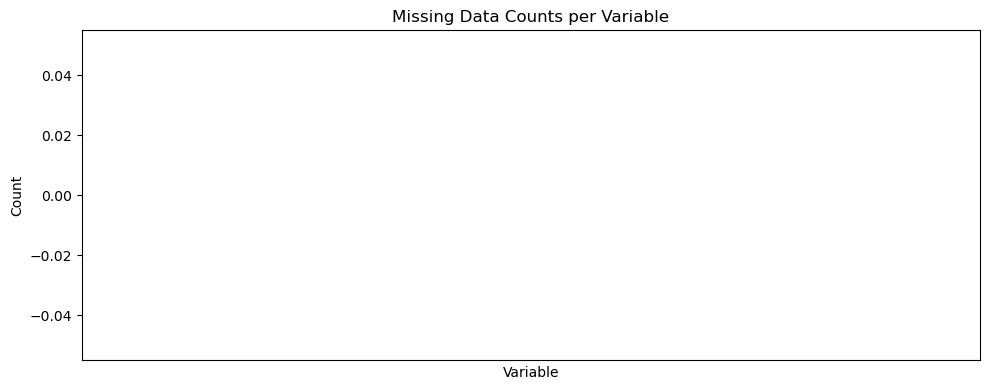

In [11]:
eda_helper_functions.plot_missing_info(train)

## High - Level Analysis of Outlier

- IsolationForest is a ensumbel algorithm for finding outlier
- make new feature called 'outlier' upon this .fit_predict() method call and also drop target feature 'Price'.
- IsolationForest only work on numeric dtpe so we select only those features which have dtye is number
- -1 shows the outlier is present  and 1 is not outlier is
- query method are used for filter the values

In [11]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [12]:
(
    train
    .assign(outlier=forest.fit_predict(
         train
        .drop(columns="price")
        .select_dtypes(include="number")
     ))
    .query("outlier == -1")
    # .duration
    # .describe()
)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-03-06,Delhi,Cochin,2024-10-06 16:40:00,2024-10-06 19:15:00,1595,2.0,No Info,12646,-1
3,Jet Airways,2019-06-06,Delhi,Cochin,2024-10-06 09:40:00,2024-10-06 04:25:00,1125,2.0,In-flight meal not included,10368,-1
4,Jet Airways,2019-05-06,Kolkata,Banglore,2024-10-06 16:30:00,2024-10-06 20:45:00,1695,1.0,In-flight meal not included,9663,-1
10,Air India,2019-05-03,Mumbai,Hyderabad,2024-10-06 15:00:00,2024-10-06 16:25:00,85,0.0,No Info,3100,-1
11,Air Asia,2019-05-12,Kolkata,Banglore,2024-10-06 19:55:00,2024-10-06 22:25:00,150,0.0,No Info,5530,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-06-01,Delhi,Cochin,2024-10-06 06:45:00,2024-10-06 04:25:00,1300,2.0,No Info,13376,-1
630,Spicejet,2019-05-27,Mumbai,Hyderabad,2024-10-06 22:45:00,2024-10-06 00:15:00,90,0.0,No Info,2017,-1
631,Indigo,2019-03-27,Chennai,Kolkata,2024-10-06 13:20:00,2024-10-06 15:35:00,135,0.0,No Info,3384,-1
632,Air India,2019-03-03,Delhi,Cochin,2024-10-06 05:55:00,2024-10-06 19:15:00,2240,2.0,No Info,13748,-1


- pair plot between numeric feature
- numeric feature ['duration','total_stop','price']
- pair plot is a symmetric plot
- so it gives only lower portion of square
- avoid unnecessary repeation

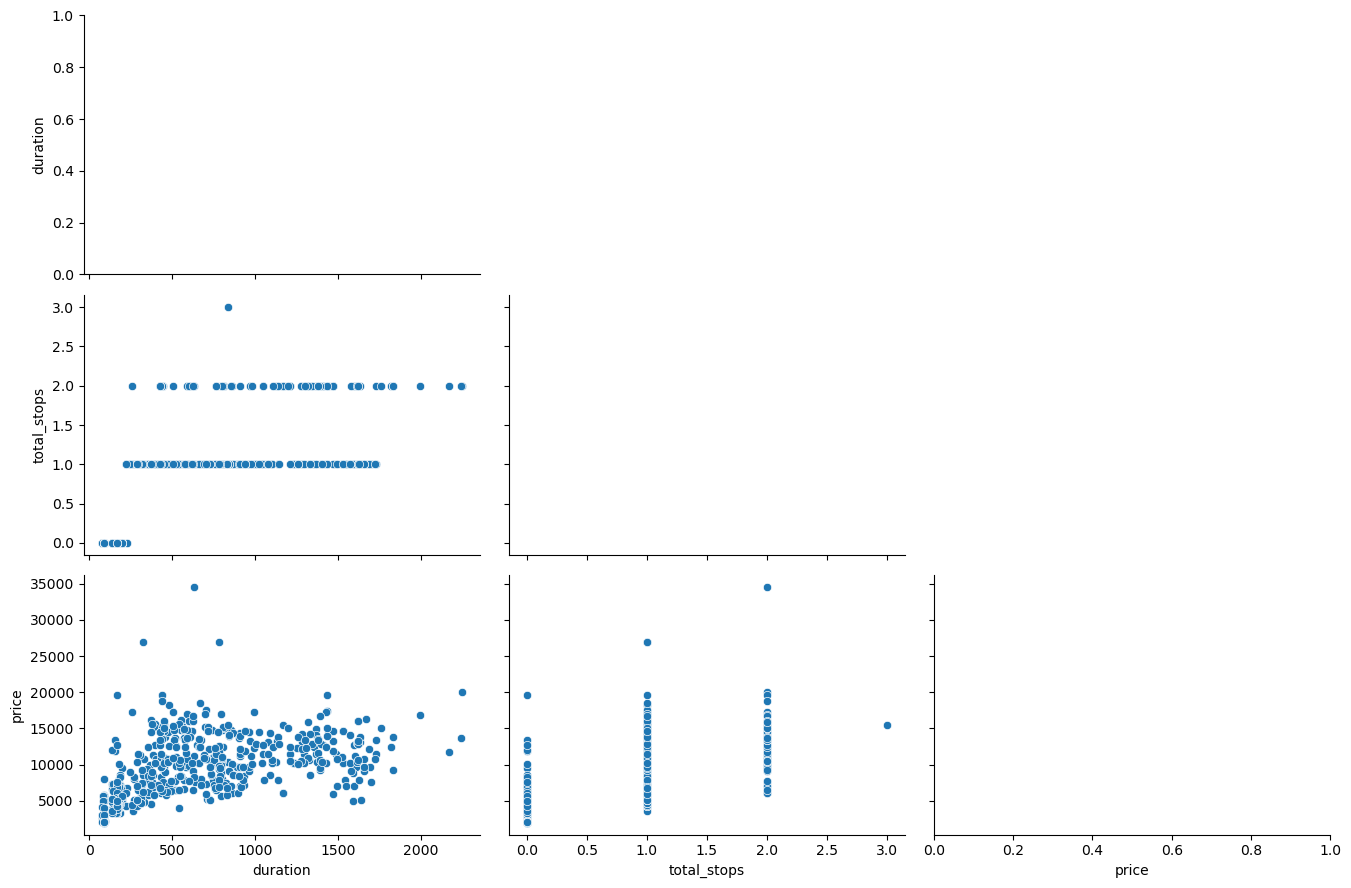

In [14]:
eda_helper_functions.pair_plots(train)

## Correlation Analysis

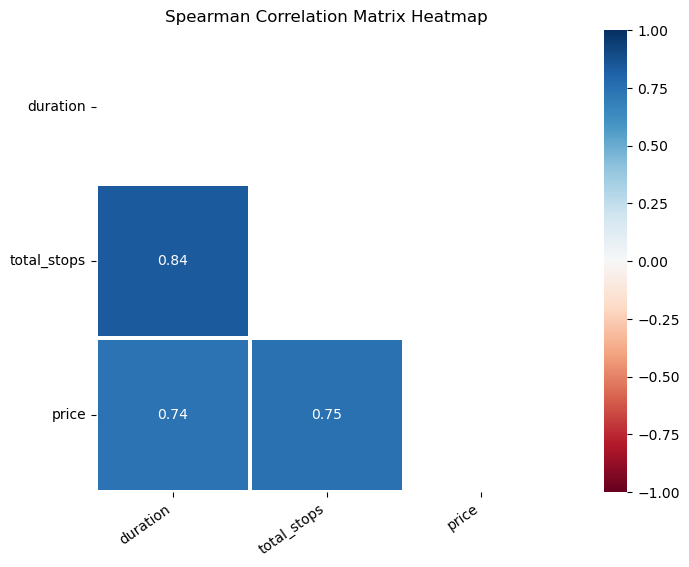

In [15]:
eda_helper_functions.correlation_heatmap(train)

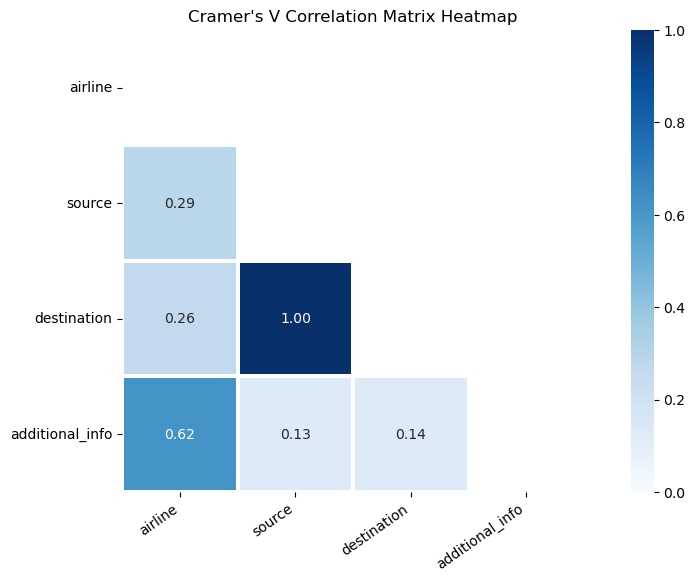

In [16]:
eda_helper_functions.cramersV_heatmap(train)

##  Detailed Analysis

In [16]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### Airline

In [18]:
train.airline

0                Air India
1        Multiple Carriers
2              Jet Airways
3              Jet Airways
4              Jet Airways
              ...         
635    Multiple Carriers  
636              Air India
637               Spicejet
638                 Indigo
639                 Indigo
Name: airline, Length: 640, dtype: object

In [17]:
eda_helper_functions.cat_summary(train, "airline")

0                Air India
1        Multiple Carriers
2              Jet Airways
3              Jet Airways
4              Jet Airways
              ...         
635    Multiple Carriers  
636              Air India
637               Spicejet
638                 Indigo
639                 Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,227


,count,percentage
category,,
Jet Airways,227,0.354687
Indigo,117,0.182812
Air India,90,0.140625
Multiple Carriers,70,0.109375
Spicejet,69,0.107813
Vistara,27,0.042188
Air Asia,20,0.031250
Goair,19,0.029687
Multiple Carriers,1,0.001563


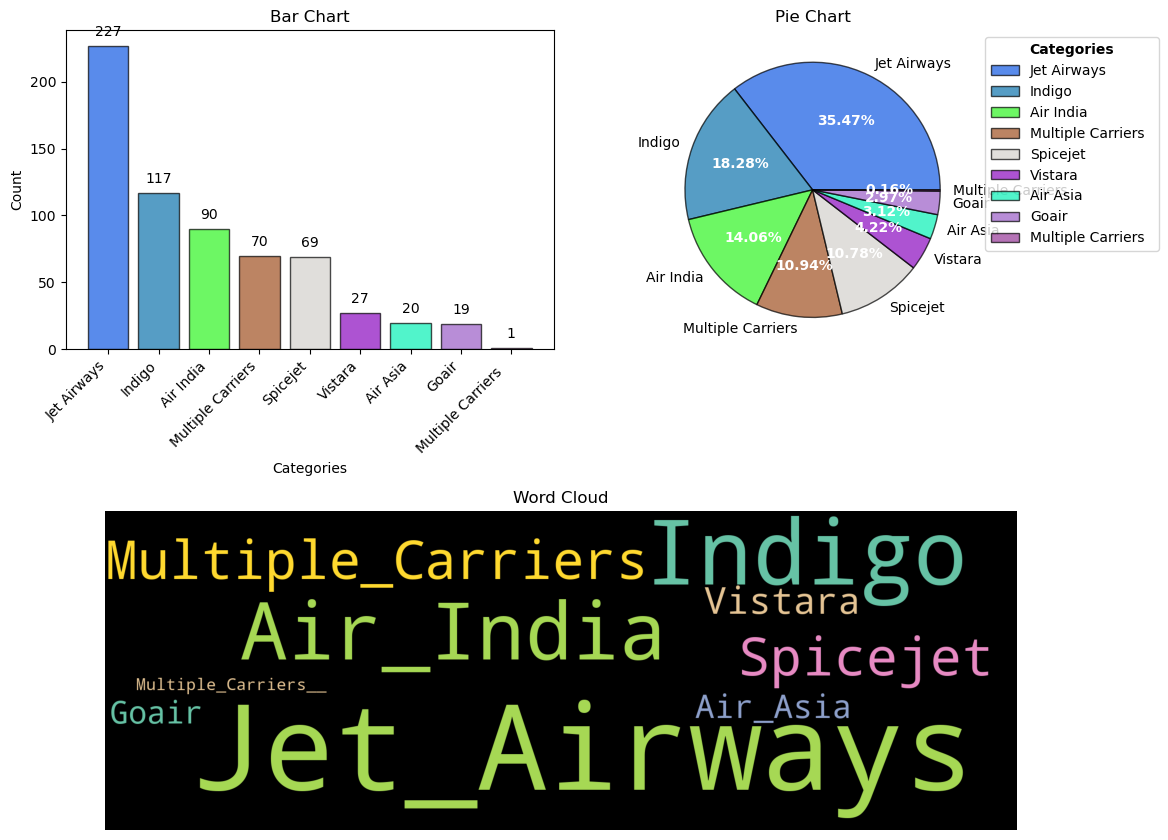

In [18]:
eda_helper_functions.cat_univar_plots(train, "airline")

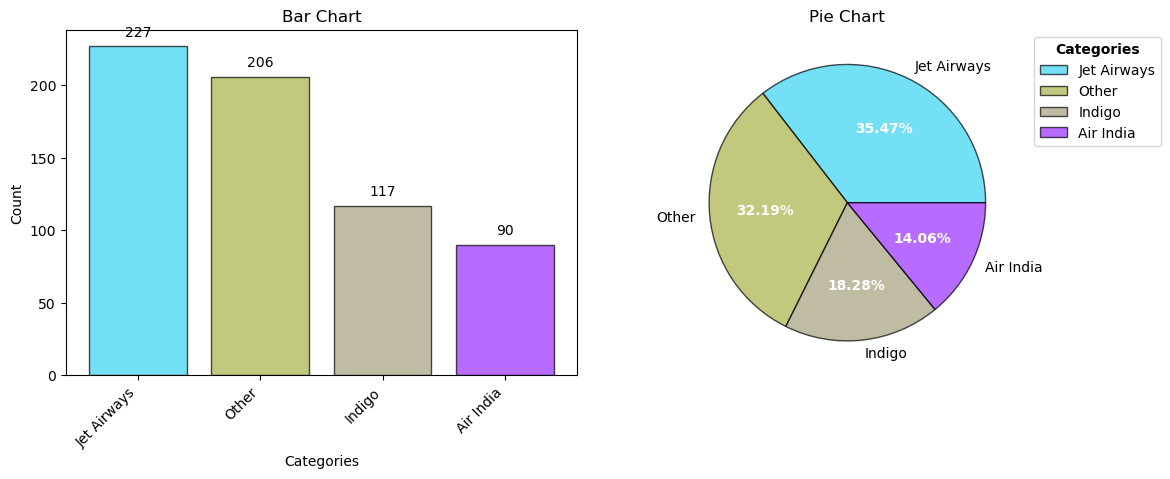

In [19]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

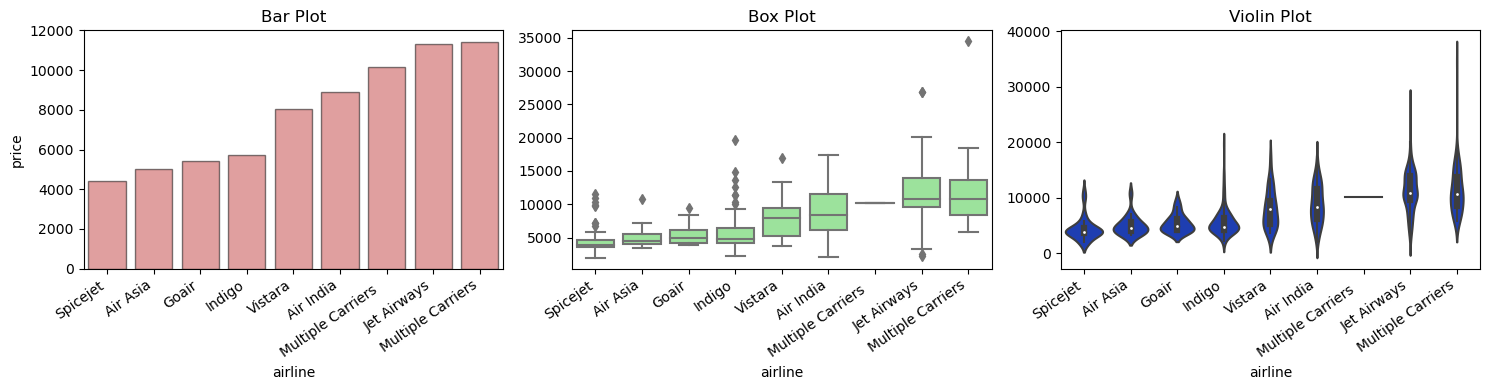

In [22]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [21]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 53.23970594129206
- p-value              : 7.470022561558432e-66
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 298.3323448464238
- p-value              : 9.32346926842502e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


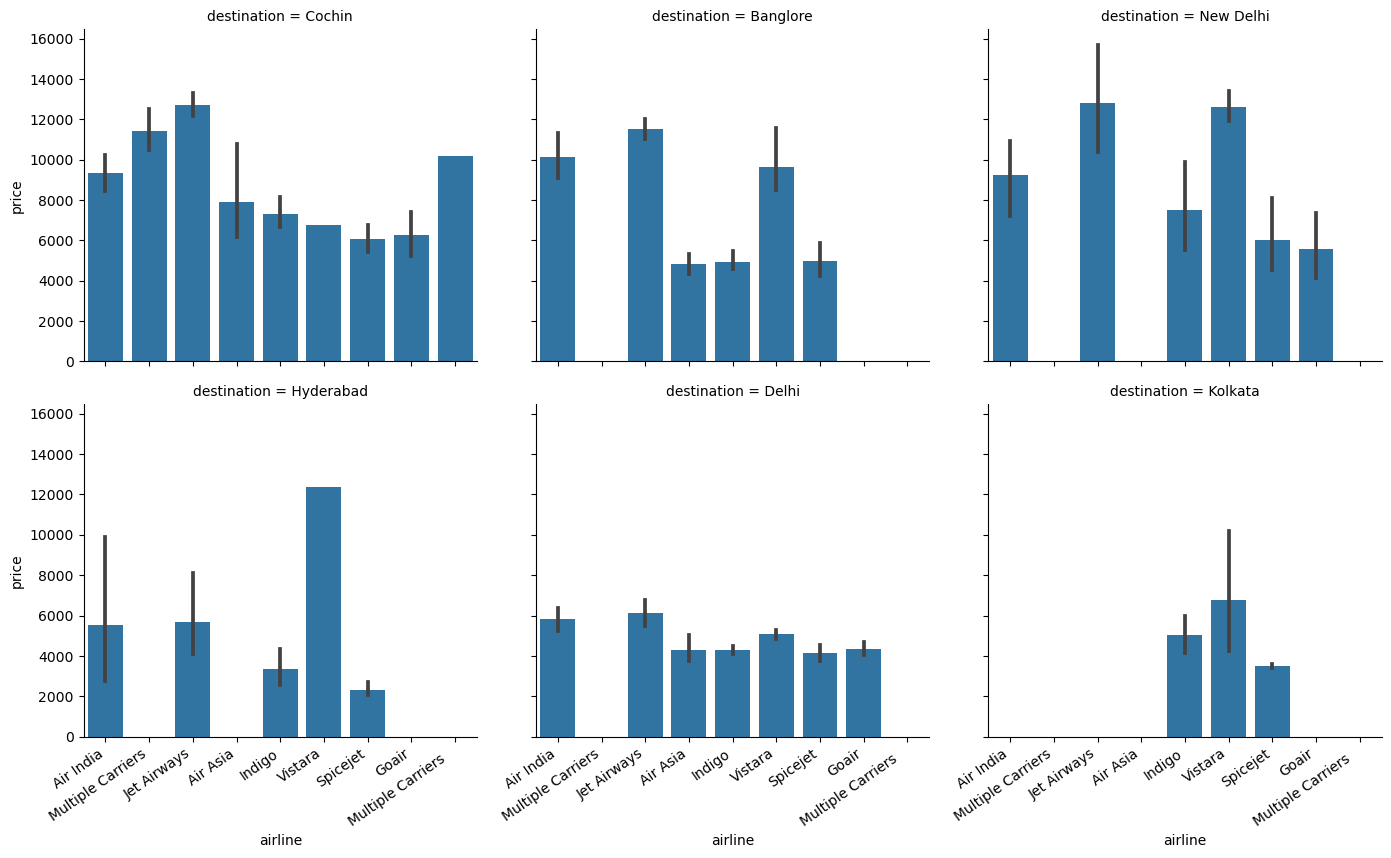

In [23]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### date_of_journey

In [25]:
train.date_of_journey

0     2019-03-06
1     2019-03-03
2     2019-05-15
3     2019-06-06
4     2019-05-06
         ...    
635   2019-03-21
636   2019-03-27
637   2019-04-09
638   2019-04-18
639   2019-06-03
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

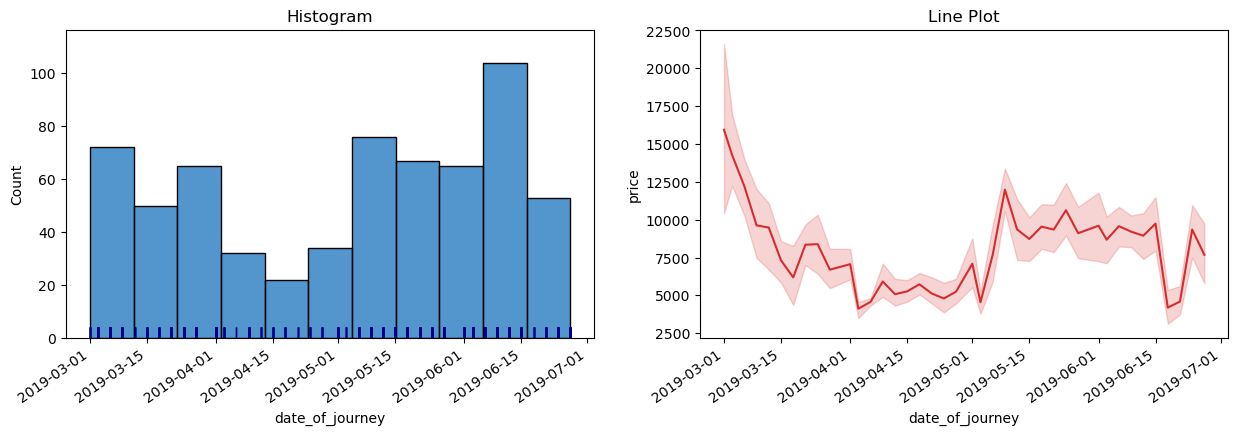

In [24]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

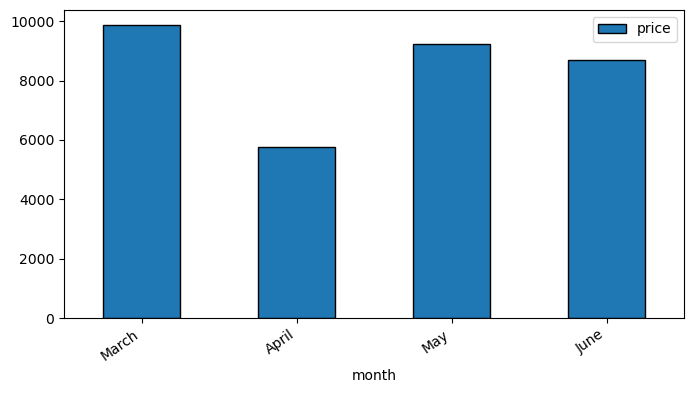

In [25]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
   )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

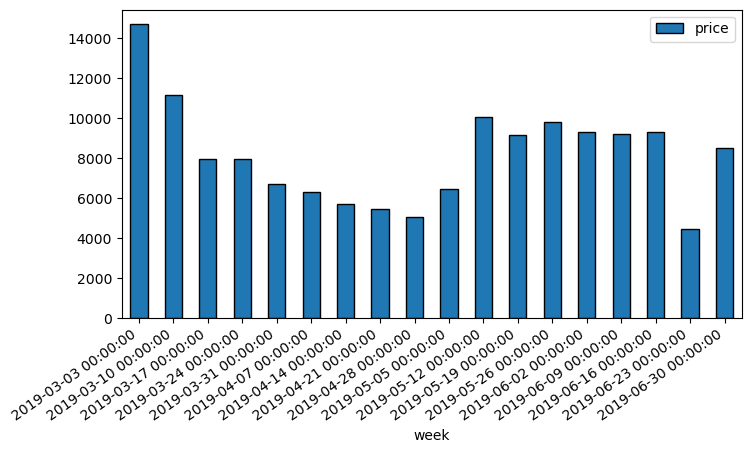

In [26]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
       kind="bar",
       figsize=(8, 4),
       edgecolor="black"
  )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

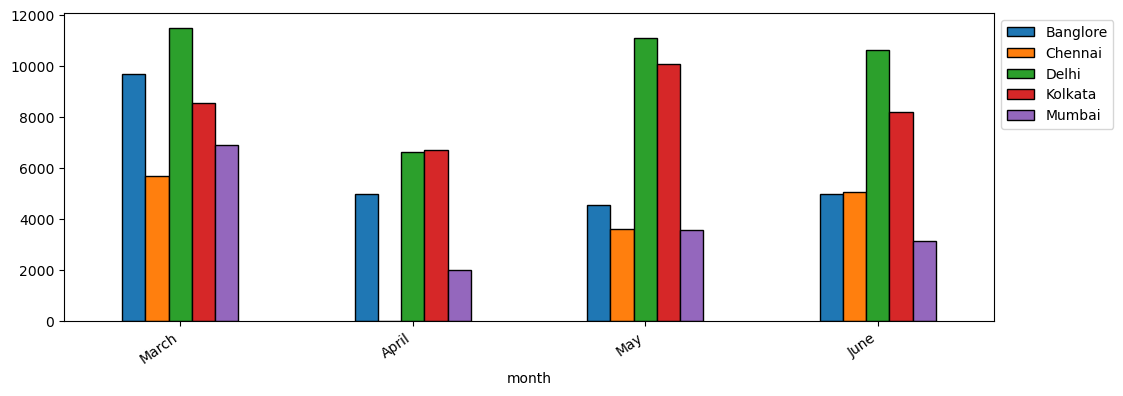

In [27]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
       kind="bar",
       figsize=(12, 4),
       edgecolor="black"
   )
)

ax = plt.gca()

ax.legend(
   loc="upper left",
   bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### dep_time

In [30]:
train.dep_time

0     2024-10-05 16:40:00
1     2024-10-05 07:10:00
2     2024-10-05 21:10:00
3     2024-10-05 09:40:00
4     2024-10-05 16:30:00
              ...        
635   2024-10-05 08:55:00
636   2024-10-05 20:30:00
637   2024-10-05 09:30:00
638   2024-10-05 13:00:00
639   2024-10-05 05:05:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

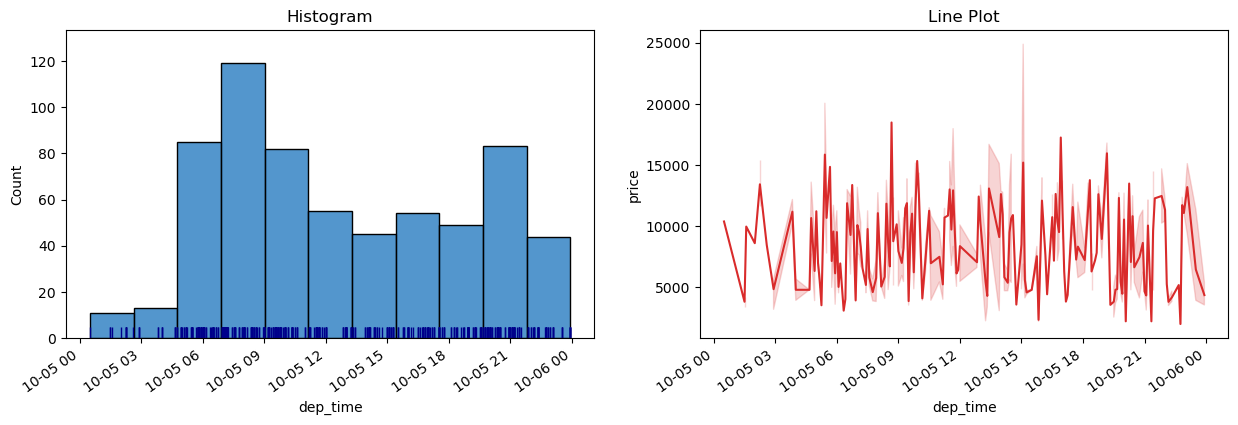

In [31]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

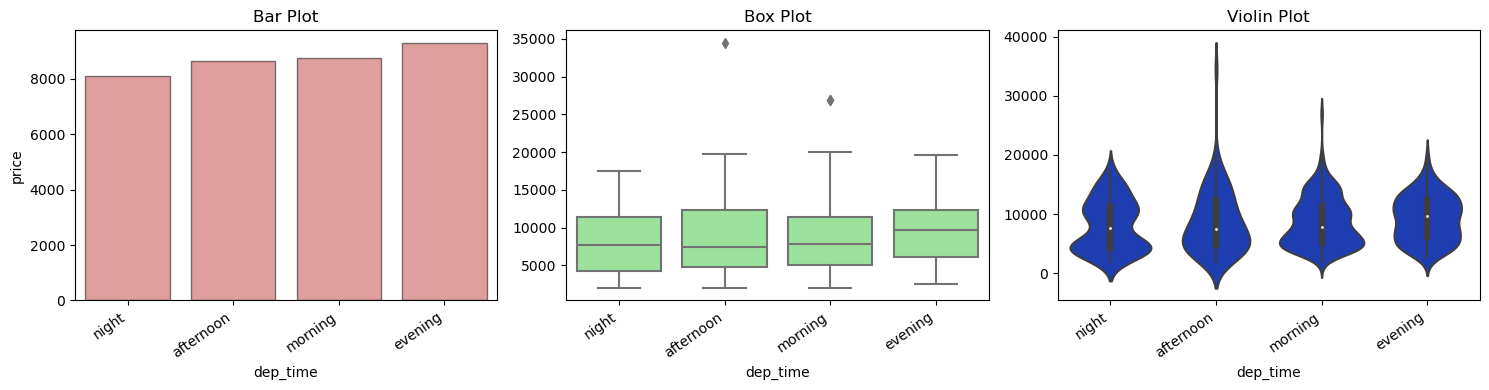

In [28]:
(
     train
        .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
           df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
           df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
          ["morning", "afternoon", "evening"],
          default="night")
   ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### duration

In [29]:
train.duration

0      1595
1       910
2       730
3      1125
4      1695
       ... 
635     620
636     705
637     170
638     170
639     425
Name: duration, Length: 640, dtype: int64

In [30]:
eda_helper_functions.num_summary(train, "duration")

0      1595
1       910
2       730
3      1125
4      1695
       ... 
635     620
636     705
637     170
638     170
639     425
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,450.00
75,845.00
90,1390.50
95,1595.25
99,1796.60


,value
mean,595.835938
trimmed mean (5%),560.902778
trimmed mean (10%),529.531250
median,450.000000


,value
var,237193.157705
std,487.024802
IQR,675.000000
mad,287.500000
coef_variance,0.817381


,value
skewness,0.968852
kurtosis,-0.010299


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.312213316409647e-23
Test Statistic       : 0.8686343431472778
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 28.605211590024965
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [31]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    450.0
0.75    845.0
Name: duration, dtype: float64

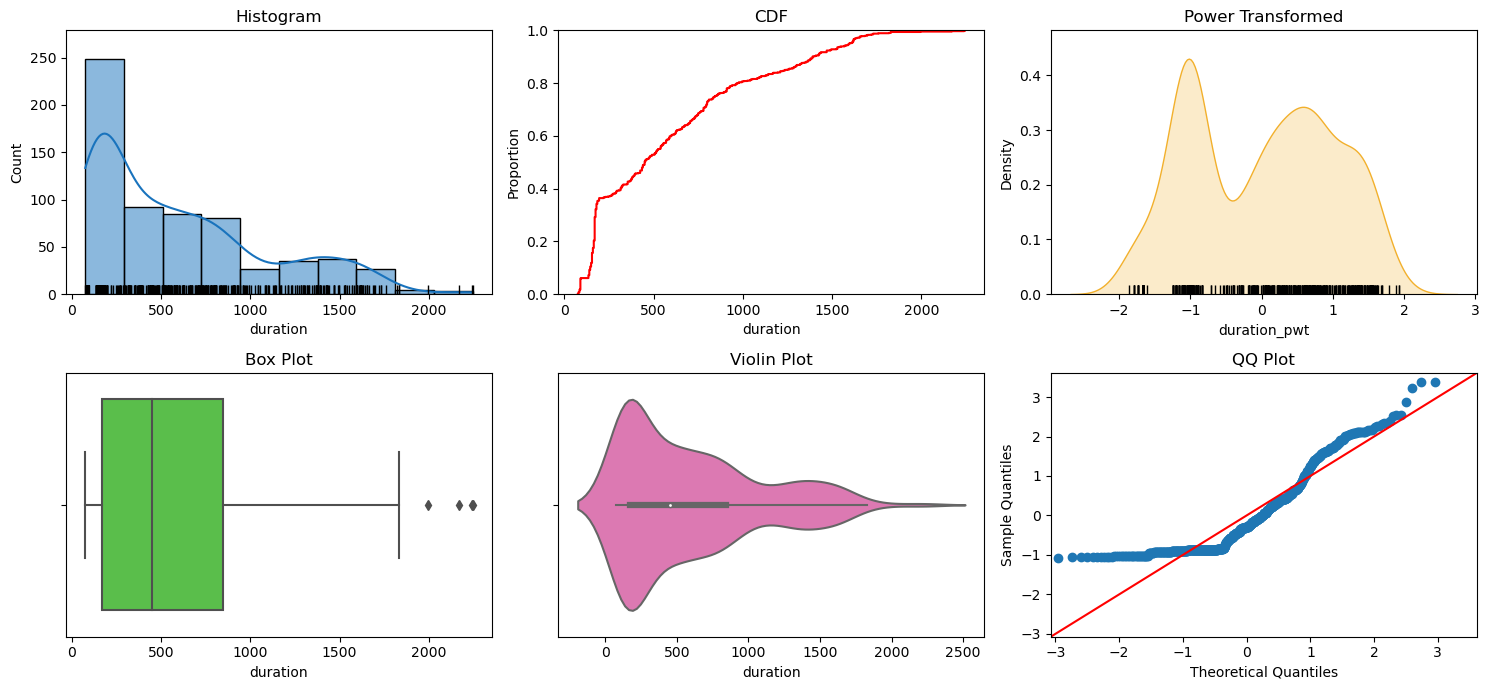

In [32]:
eda_helper_functions.num_univar_plots(train, "duration")

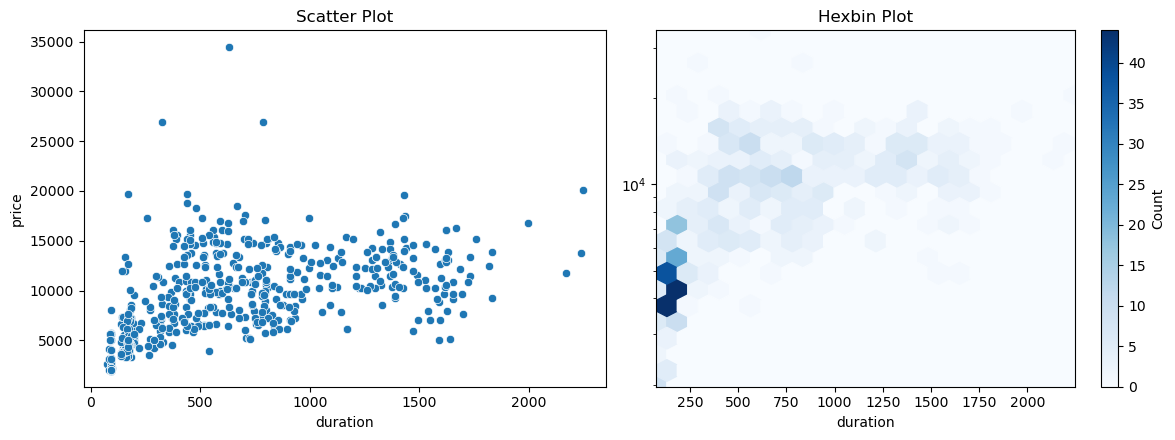

In [33]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
    yscale="log",
    gridsize=20,
    cmap="Blues"
   )
)

In [34]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5781743850367275
- p-value              : 2.3163918352099524e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7357123629425749
- p-value              : 4.655831139638776e-110
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


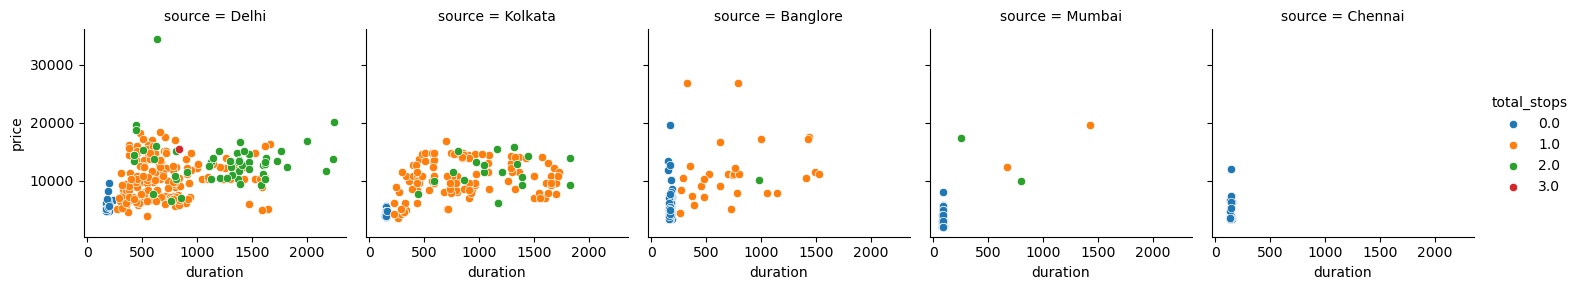

In [36]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

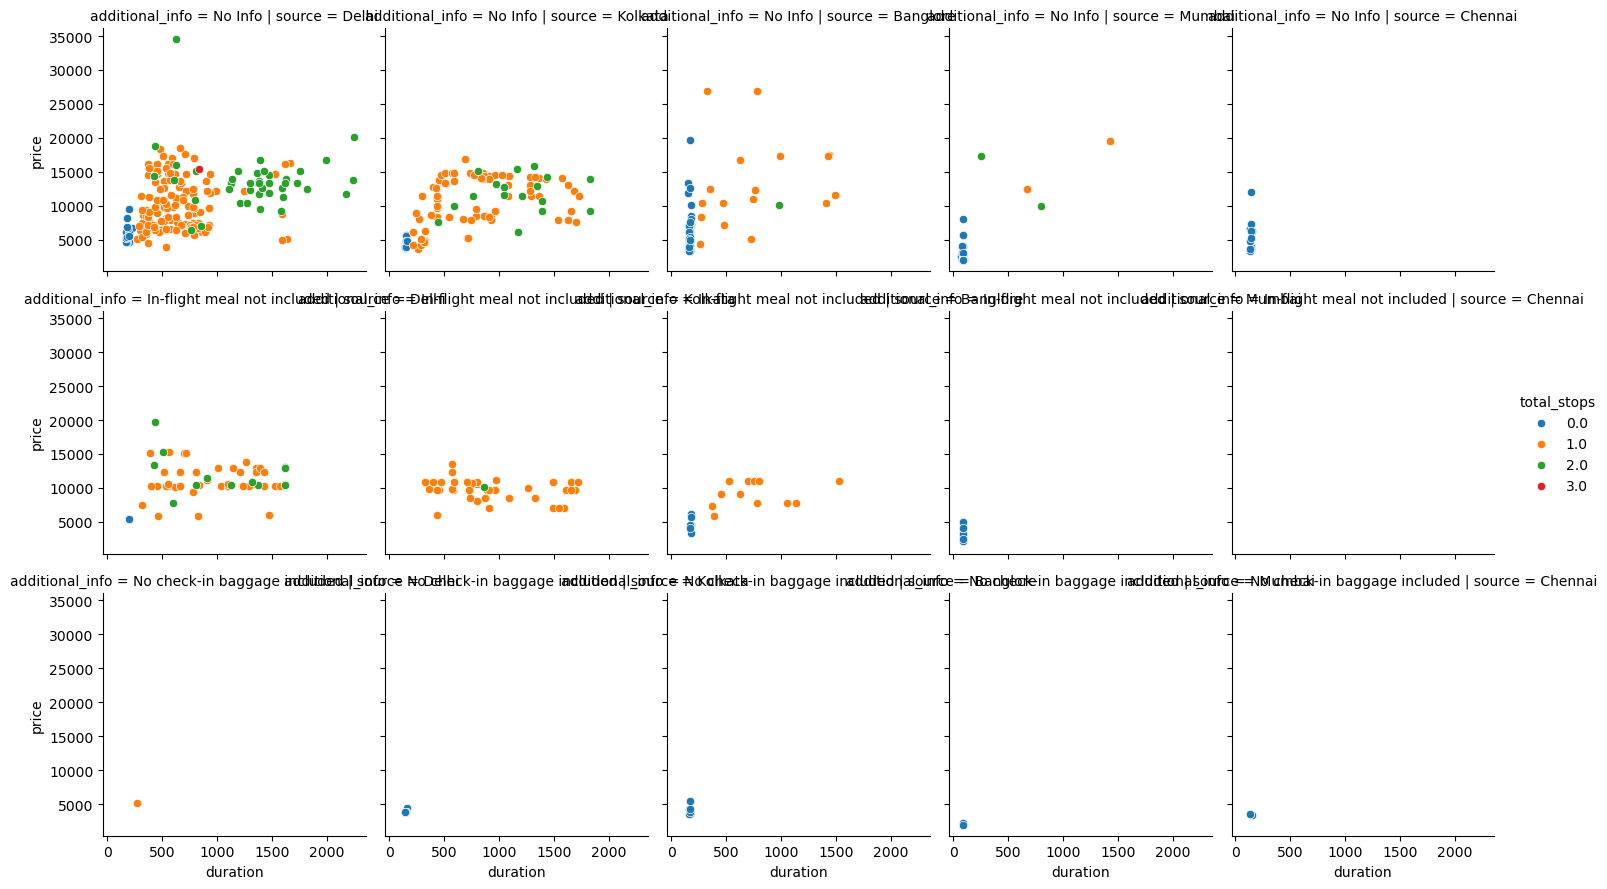

In [37]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [41]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -842.5
Upper Limit : 1857.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
316,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-05 19:10:00,2024-10-05 04:25:00,1995,2.0,No Info,16809
417,Air India,2019-03-03,Delhi,Cochin,2024-10-05 07:05:00,2024-10-05 19:15:00,2170,2.0,No Info,11762
632,Air India,2019-03-03,Delhi,Cochin,2024-10-05 05:55:00,2024-10-05 19:15:00,2240,2.0,No Info,13748
208,Jet Airways,2019-03-03,Delhi,Cochin,2024-10-05 05:25:00,2024-10-05 18:50:00,2245,2.0,No Info,20064


### additional info

In [42]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1       In-flight meal not included
2       In-flight meal not included
3       In-flight meal not included
4       In-flight meal not included
                   ...             
635                         No Info
636                         No Info
637    No check-in baggage included
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,3
top,No Info
freq,477


,count,percentage
category,,
No Info,477,0.745313
In-flight meal not included,132,0.206250
No check-in baggage included,31,0.048438


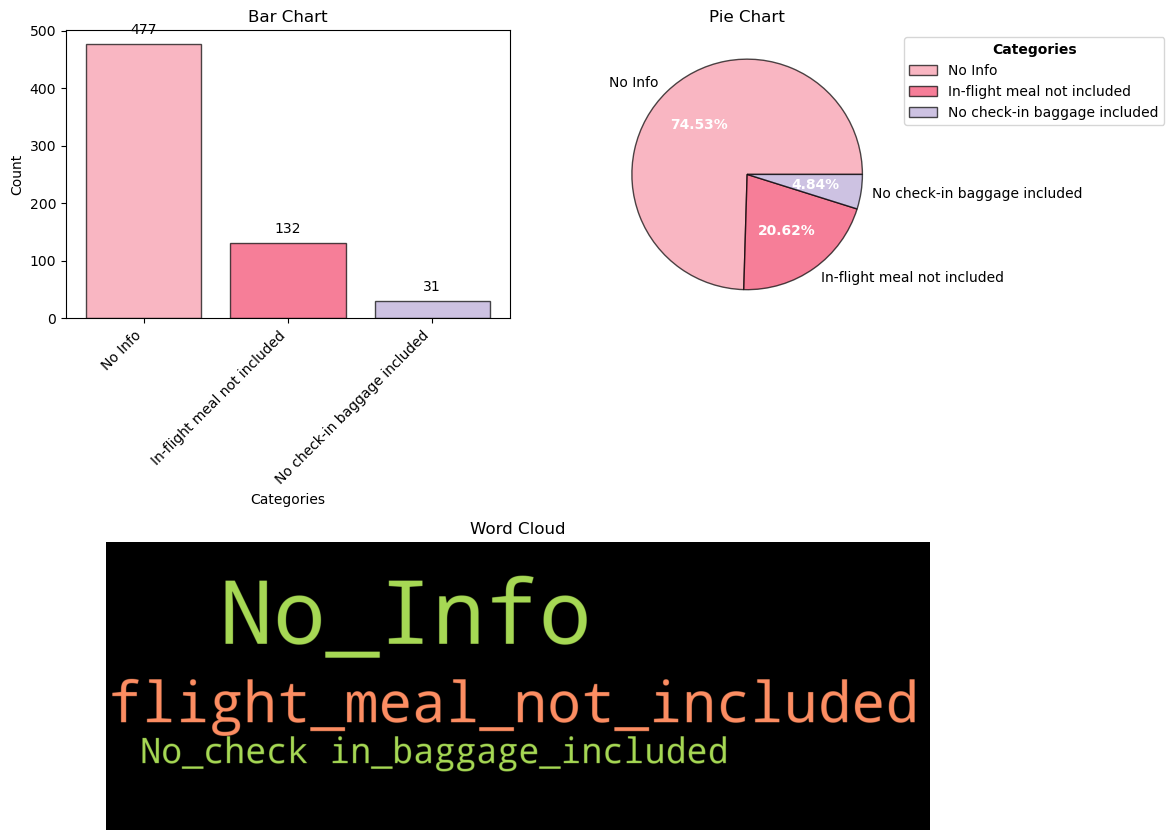

In [43]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

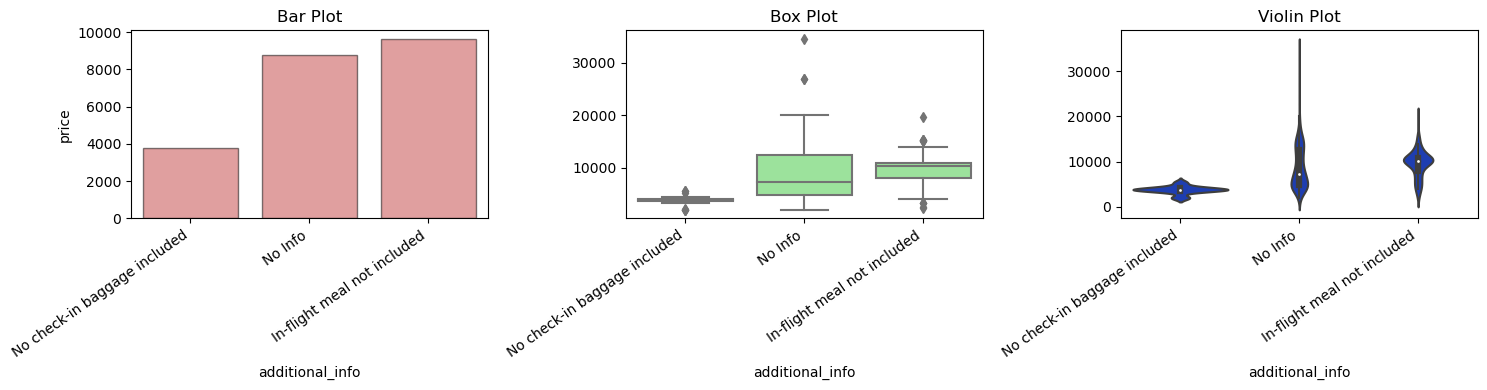

In [44]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

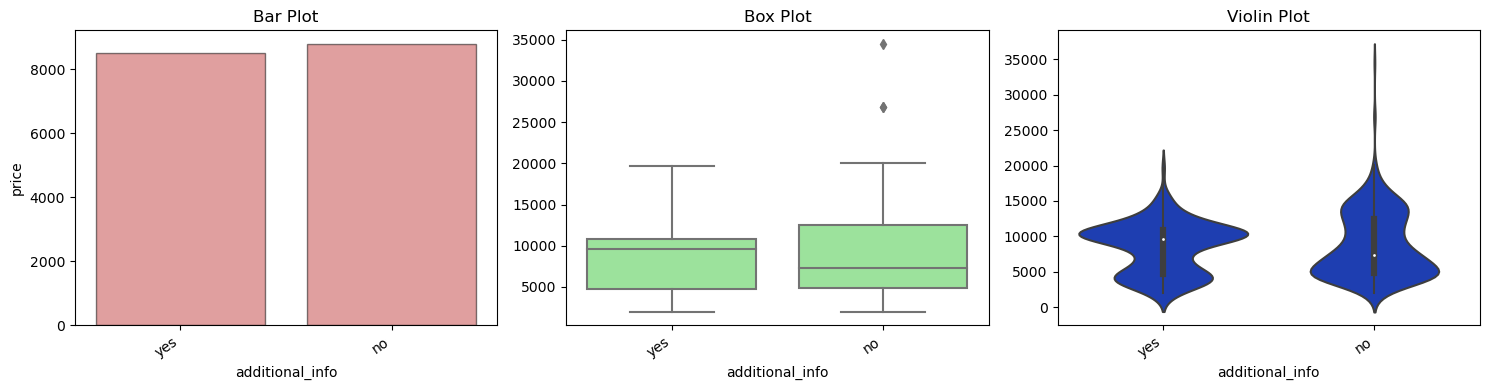

In [38]:
# convertion additional_info into a binary feature for analysis

(
        train
        .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
   ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

# Automated EDA

In [46]:
#from ydata_profiling import ProfileReport

In [47]:
#report = ProfileReport(train)

In [39]:
#report.to_file(output_file="output.html")

In [40]:
 df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                   index=['cobra', 'viper', 'sidewinder'],
                   columns=['max_speed', 'shield'])

In [43]:
df.loc[['viper']]

,max_speed,shield
viper,4,5
